In [1]:
import sys
import os as os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from utils import ISTA, IST
import scipy.io as sio
from scipy import stats

In [50]:
sensor_coords = np.array([
    [80,  750],[100,  345],[70, 170],[190, 930],[170, 30],[240, 320],[260, 360],[260, 460],[350, 700],[370, 410],
    [400, 950],[330, 640],[410, 650],[550, 20],[620, 750],[760, 760],[650,  10],[660, 230],[710, 195],[870, 650],
    [920, 950],[930, 610],[960, 190],[970, 260],[970, 980]
])

In [6]:
def observer(n, q, A, G, tau, lam, y, K):

    # Estimate x_tilda using ISTA
    lam_weights = np.concatenate((np.full(n, 10), np.full(q,20)))
    x_hat = []
    a_hat = []
    z_hat = []

    z_0 = np.zeros(n+q)
    x_hat.append(z_0[:n])
    a_hat.append(z_0[n:])
    z_hat.append(z_0)

    for k in range(K-1):
        z = z_hat[k] + (np.dot(tau, np.dot(G.T, (y[:,k] - np.dot(G, z_hat[k])))))
        gamma = tau * lam * lam_weights
        z_hat_plus = IST(z, gamma)
        x_hat.append(np.dot(A,z_hat_plus[:n]))
        a_hat.append(z_hat_plus[n:])
        z_hat.append(np.hstack((x_hat[k+1], a_hat[k+1])))
    return x_hat, a_hat

In [47]:
def task_4():
    np.set_printoptions(formatter={'all': lambda x: "{:.4g}".format(x)})
    cwd = os.getcwd()
    #original matrices
    mat = sio.loadmat(cwd + r'/../utils/tracking_moving_targets.mat')
    A = mat['A']
    y = mat['Y']
    D = mat['D']
    n = D.shape[1]
    q = D.shape[0]
    K = y.shape[1]

    G = np.hstack((D, np.eye(q)))
    #normalize G
    G = stats.zscore(G, axis=0)

    tau = 1 / (np.linalg.norm(G, ord=2)**2) - 10**(-8)
    lam = 1
    x_hat, a_hat = observer(n, q, A, G, tau, lam, y, K)


    # # Extract the estimated targets' location by taking the 3 greatest values of the first n elements of w_estimated
    # estimated_targets_location = np.argsort(w_estimated[:n])[-3:]

    # # Extract the estimated attacked vectors from the support of the last q eleemnts of w_estimated
    # estimated_attacked_sensors = np.where(w_estimated[n:] != 0)[0]
    
    # print("Estimated targets location: ", estimated_targets_location)
    # print("Estimated attacked sensors: ", estimated_attacked_sensors)

    H = 10  # Grid's height (# celle)
    L = 10  # Grid's length (# celle)
    W = 100  # Cell's width (cm)

    room_grid = np.zeros((2, n))
    for i in range(n):
        room_grid[0, i] = W//2 + (i % L) * W
        room_grid[1, i] = W//2 + (i // L) * W
    
    fig, ax = plt.subplots()
    true_location = []
    true_location.append([21,34,85])
    # append other 49 true locations by subtracting 1 from each element
    for i in range(49):
        true_location.append([x-1 for x in true_location[i]])

    


    for x,true_x,a in zip(x_hat,true_location, a_hat):
        estimated_targets_location = np.argsort(x)[-3:]
        estimated_attacked_sensors = np.argsort(a)[-2:]
        print("Estimated attacked sensors: ", estimated_attacked_sensors)

        # Pulisci il grafico precedente
        ax.clear()

        # Plotta i nuovi dati
        ax.plot(room_grid[0, true_x], room_grid[1, true_x], 's', markersize=9, 
                markeredgecolor=np.array([40, 208, 220])/255, 
                markerfacecolor=np.array([40, 208, 220])/255)
        # update true location by subtracting 1 from each element as red circles
        ax.plot(room_grid[0, estimated_targets_location], room_grid[1, estimated_targets_location], 'x', markersize=9, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor=np.array([255, 255, 255])/255)
        # Plot of sensors
        # Plot of sensors
        ax.scatter(sensor_coords[:, 0], sensor_coords[:, 1], s=50, c='pink', alpha=0.5, label='Sensors')

        ax.plot(sensor_coords[estimated_attacked_sensors[0], 0], sensor_coords[estimated_attacked_sensors[0], 1], 'o', markersize=12, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor='none')
        ax.plot(sensor_coords[estimated_attacked_sensors[1], 0], sensor_coords[estimated_attacked_sensors[1], 1], 'o', markersize=12, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor='none')

        ax.grid(True)
        ax.legend(['True Targets', 'Estimated Targets', 'Sensors', 'Attacked sensors'], loc='best')

        ax.set_xticks(np.arange(100, 1001, 100))
        ax.set_yticks(np.arange(100, 1001, 100))
        ax.set_xlabel('(cm)')
        ax.set_ylabel('(cm)')
        ax.set_xlim([0, 1000])
        ax.set_ylim([0, 1000])
        ax.set_aspect('equal', adjustable='box')

        # Aggiorna la figura
        plt.pause(0.5)
        

    # Mostra il grafico finale
    plt.show()
    return 

Estimated attacked sensors:  [11 24]


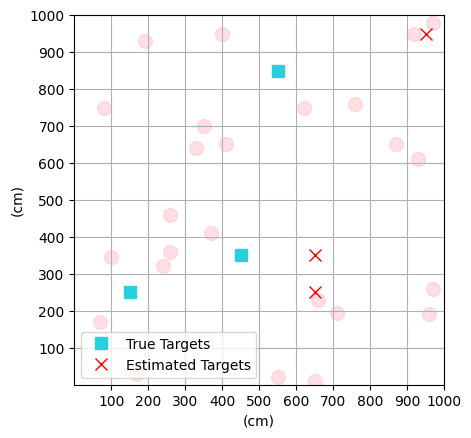

Estimated attacked sensors:  [13 11]
Estimated attacked sensors:  [11 3]
Estimated attacked sensors:  [17 4]
Estimated attacked sensors:  [4 11]
Estimated attacked sensors:  [19 3]
Estimated attacked sensors:  [11 3]
Estimated attacked sensors:  [19 11]
Estimated attacked sensors:  [11 19]
Estimated attacked sensors:  [11 19]
Estimated attacked sensors:  [11 3]
Estimated attacked sensors:  [3 19]
Estimated attacked sensors:  [11 19]
Estimated attacked sensors:  [19 15]
Estimated attacked sensors:  [11 15]
Estimated attacked sensors:  [19 11]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [11 15]
Estimated attacked sensors:  [11 15]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [19 11]
Estimated attacked sensors:  [19 11]
Estimated attacked sensors:  [19 11]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [15 11]
Estimated attacked sensors:  [15 11]
Estimate

In [48]:
task_4()

In [16]:
def task_4_optional():
    np.set_printoptions(formatter={'all': lambda x: "{:.4g}".format(x)})
    cwd = os.getcwd()
    #original matrice
    mat = sio.loadmat(cwd + r'/../utils/tracking_moving_targets.mat')
    # mat = sio.loadmat(cwd + r'/CPS_project/PT1-Modeling/src/utils/tracking_moving_targets.mat')
    A = mat['A']
    # y = mat['Y']
    D = mat['D']
    n = D.shape[1]
    q = D.shape[0]
    K = 50

    H = 10  # Grid's height (# celle)
    L = 10  # Grid's length (# celle)
    W = 100  # Cell's width (cm)

    sensor_coords = np.array([
        [80,  750],[100,  345],[70, 170],[190, 930],[170, 30],[240, 320],[260, 360],[260, 460],[350, 700],[370, 410],
        [400, 950],[330, 640],[410, 650],[550, 20],[620, 750],[760, 760],[650,  10],[660, 230],[710, 195],[870, 650],
        [920, 950],[930, 610],[960, 190],[970, 260],[970, 980]
    ])

    room_grid = np.zeros((2, n))
    for i in range(n):
        room_grid[0, i] = W//2 + (i % L) * W
        room_grid[1, i] = W//2 + (i // L) * W
    
    true_location = []
    true_location.append([21,34,85])
    # append other 49 true locations by subtracting 1 from each element
    for i in range(49):
        true_location.append([x-1 for x in true_location[i]])
    
    # Numero di quadratini della griglia (100)
    grid_size = 100
    # Inizializza una lista per contenere i vettori colonna di 100 elementi per ogni istante di tempo
    result = []
    # Itera attraverso ogni istante temporale
    for i in range(49):
        # Crea un vettore colonna di 100 elementi inizializzato a 0
        vector = np.zeros(grid_size)
        # Ottieni le posizioni dei 3 target al tempo t
        positions = true_location[i]
        # Correggi le posizioni negative, sottraendole da 100
        corrected_positions = [(p if p >= 0 else 100 + p) for p in positions]
        # Imposta a 1 le posizioni nel vettore colonna
        for pos in corrected_positions:
            vector[pos] = 1
        # Aggiungi il vettore colonna alla lista dei risultati
        result.append(vector)
    # Converti la lista dei risultati in una matrice numpy
    x_true = np.array(result).T  # Trasponi per avere 100 righe e 50 colonne
    # Stampa il risultato
    print(x_true)
    print(len(x_true))

    attacked_sensors = [11, 15]  # corrispondenti ai sensori 11 e 15
    # Create the vector of measurement corrupted with attacks
    for i in range(49):
        # noise = 10**(-2) * np.random.randn(q)
        Y = np.dot(D, x_true)
    y = Y
    print(y)
    for i in range(24):
        y[11, i] = Y[11, i] + 0.5 * Y[11, i]
        y[15, i] = Y[15, i] + 0.5 * Y[15, i]
    print(y)

    G = np.hstack((D, np.eye(q)))
    #normalize G
    G = stats.zscore(G, axis=0)
    tau = 1 / (np.linalg.norm(G, ord=2)**2) - 10**(-8)
    lam = 1

    x_hat, a_hat = observer(n, q, A, G, tau, lam, y, K)

    fig, ax = plt.subplots()
    for x,true_x,a in zip(x_hat,true_location, a_hat):
        estimated_targets_location = np.argsort(x)[-3:]
        estimated_attacked_sensors = np.argsort(a)[-2:]
        print("Estimated attacked sensors: ", estimated_attacked_sensors)

        # Pulisci il grafico precedente
        ax.clear()

        # Plotta i nuovi dati
        ax.plot(room_grid[0, true_x], room_grid[1, true_x], 's', markersize=9, 
                markeredgecolor=np.array([40, 208, 220])/255, 
                markerfacecolor=np.array([40, 208, 220])/255)
        # update true location by subtracting 1 from each element as red circles
        ax.plot(room_grid[0, estimated_targets_location], room_grid[1, estimated_targets_location], 'x', markersize=9, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor=np.array([255, 255, 255])/255)
        # Plot of sensors
        ax.scatter(sensor_coords[:, 0], sensor_coords[:, 1], s=50, c='pink', alpha=0.5, label='Sensors')

        ax.plot(sensor_coords[estimated_attacked_sensors[0], 0], sensor_coords[estimated_attacked_sensors[0], 1], 'o', markersize=12, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor='none')
        ax.plot(sensor_coords[estimated_attacked_sensors[1], 0], sensor_coords[estimated_attacked_sensors[1], 1], 'o', markersize=12, 
                markeredgecolor=np.array([255, 0, 0])/255, 
                markerfacecolor='none')

        ax.grid(True)
        ax.legend(['True Targets', 'Estimated Targets', 'Sensors', 'Attacked sensors'], loc='best')

        ax.set_xticks(np.arange(100, 1001, 100))
        ax.set_yticks(np.arange(100, 1001, 100))
        ax.set_xlabel('(cm)')
        ax.set_ylabel('(cm)')
        ax.set_xlim([0, 1000])
        ax.set_ylim([0, 1000])
        ax.set_aspect('equal', adjustable='box')

        # Aggiorna la figura
        plt.pause(0.5)
        

    # Mostra il grafico finale
    plt.show()
    return 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
100
[[-364 -371.1 -361 ... -373.4 -369.6 -443.8]
 [-375.1 -460.3 -323.9 ... -270.8 -276.2 -361.5]
 [-458.9 -467 -461.2 ... -264.9 -275.2 -285.2]
 ...
 [-281.2 -274.4 -359.6 ... -378 -366.4 -278.8]
 [-285.5 -277.8 -357.2 ... -371.4 -361 -349.3]
 [-368.2 -377.7 -291.4 ... -250.4 -259.1 -270.1]]
[[-364 -371.1 -361 ... -373.4 -369.6 -443.8]
 [-375.1 -460.3 -323.9 ... -270.8 -276.2 -361.5]
 [-458.9 -467 -461.2 ... -264.9 -275.2 -285.2]
 ...
 [-281.2 -274.4 -359.6 ... -378 -366.4 -278.8]
 [-285.5 -277.8 -357.2 ... -371.4 -361 -349.3]
 [-368.2 -377.7 -291.4 ... -250.4 -259.1 -270.1]]
Estimated attacked sensors:  [11 24]


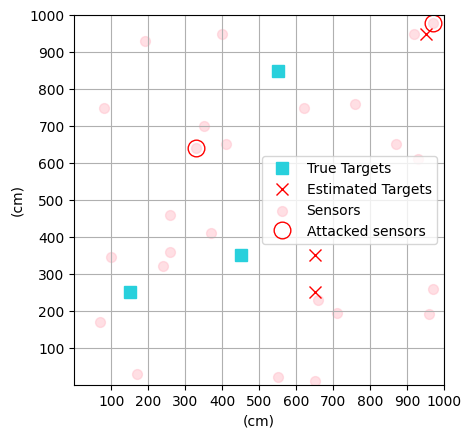

Estimated attacked sensors:  [4 13]
Estimated attacked sensors:  [13 3]
Estimated attacked sensors:  [4 17]
Estimated attacked sensors:  [17 4]
Estimated attacked sensors:  [4 3]
Estimated attacked sensors:  [4 3]
Estimated attacked sensors:  [17 3]
Estimated attacked sensors:  [3 17]
Estimated attacked sensors:  [17 3]
Estimated attacked sensors:  [17 3]
Estimated attacked sensors:  [17 3]
Estimated attacked sensors:  [17 3]
Estimated attacked sensors:  [17 9]
Estimated attacked sensors:  [17 9]
Estimated attacked sensors:  [17 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [20 9]
Estimated attacked sensors:  [21 20]
Estimated attacked sensors:  [21 20]
Estimated attacked sensors:  [21 20]
Estimated attacked sensors:  [21 20]
Estimated attacked sensors:  [21 20]
Estimated attacked sensors:  [9 20]
Estimated attacked sensor

In [17]:
task_4_optional()